                             Feature Engineering Assignment - Aadish Agrawal

You have to address the strategies and data challenges you have faced in your project. The answers are fine, but you may like to brief why you had used this algorithm in the project or data analysis, along with its values in it.And also you have explain more about univariate & bivariate Analysis. Range estimate at 95%, confidence for the model performance in production, these are the missing details in your project. You need to provide the key hyper parameters available for the selected algorithm and regularization techniques used in your model. Also you have to write the advantages & disadvantages of the algorithm used in your project, after that you have to compare your results with the base model. Keep up your good work

                                 Import Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 



In [2]:
df = pd.read_csv("concrete (1).csv")
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


                            Descriptive Analysis of Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
#Slag, ash and Superplastic has lots of 0's entries- Presuming 0's are not data pollution as Concrete might have 0% contribution from these attributes 
df.describe(include= 'all')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.shape

(1030, 9)

                            Visual analysis of dataset

Correlation map and Pair Plot Summary:

Correlation with Target Variable and Attributes

1. Strength|Cement(0.5) is Positive correlated followed by Strength|Superplastic(0.37) & n       Strength|Age(0.33)

2. Strength|Water(-0.29) is Negatively Correlated

Correlation among various attribues

1. Superplastic|ash(0.38) are positively correlated followed by Age|Water(0.28)
2. Seuperplastic|water(-0.66) are negatively correlated followed by fineagg|water(-0.45) and ash|cement(-0.4)


Thus, here we can use PCA for Feature Extraction

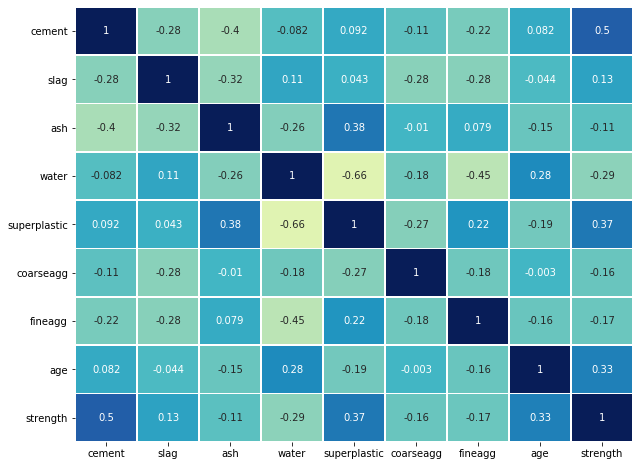

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

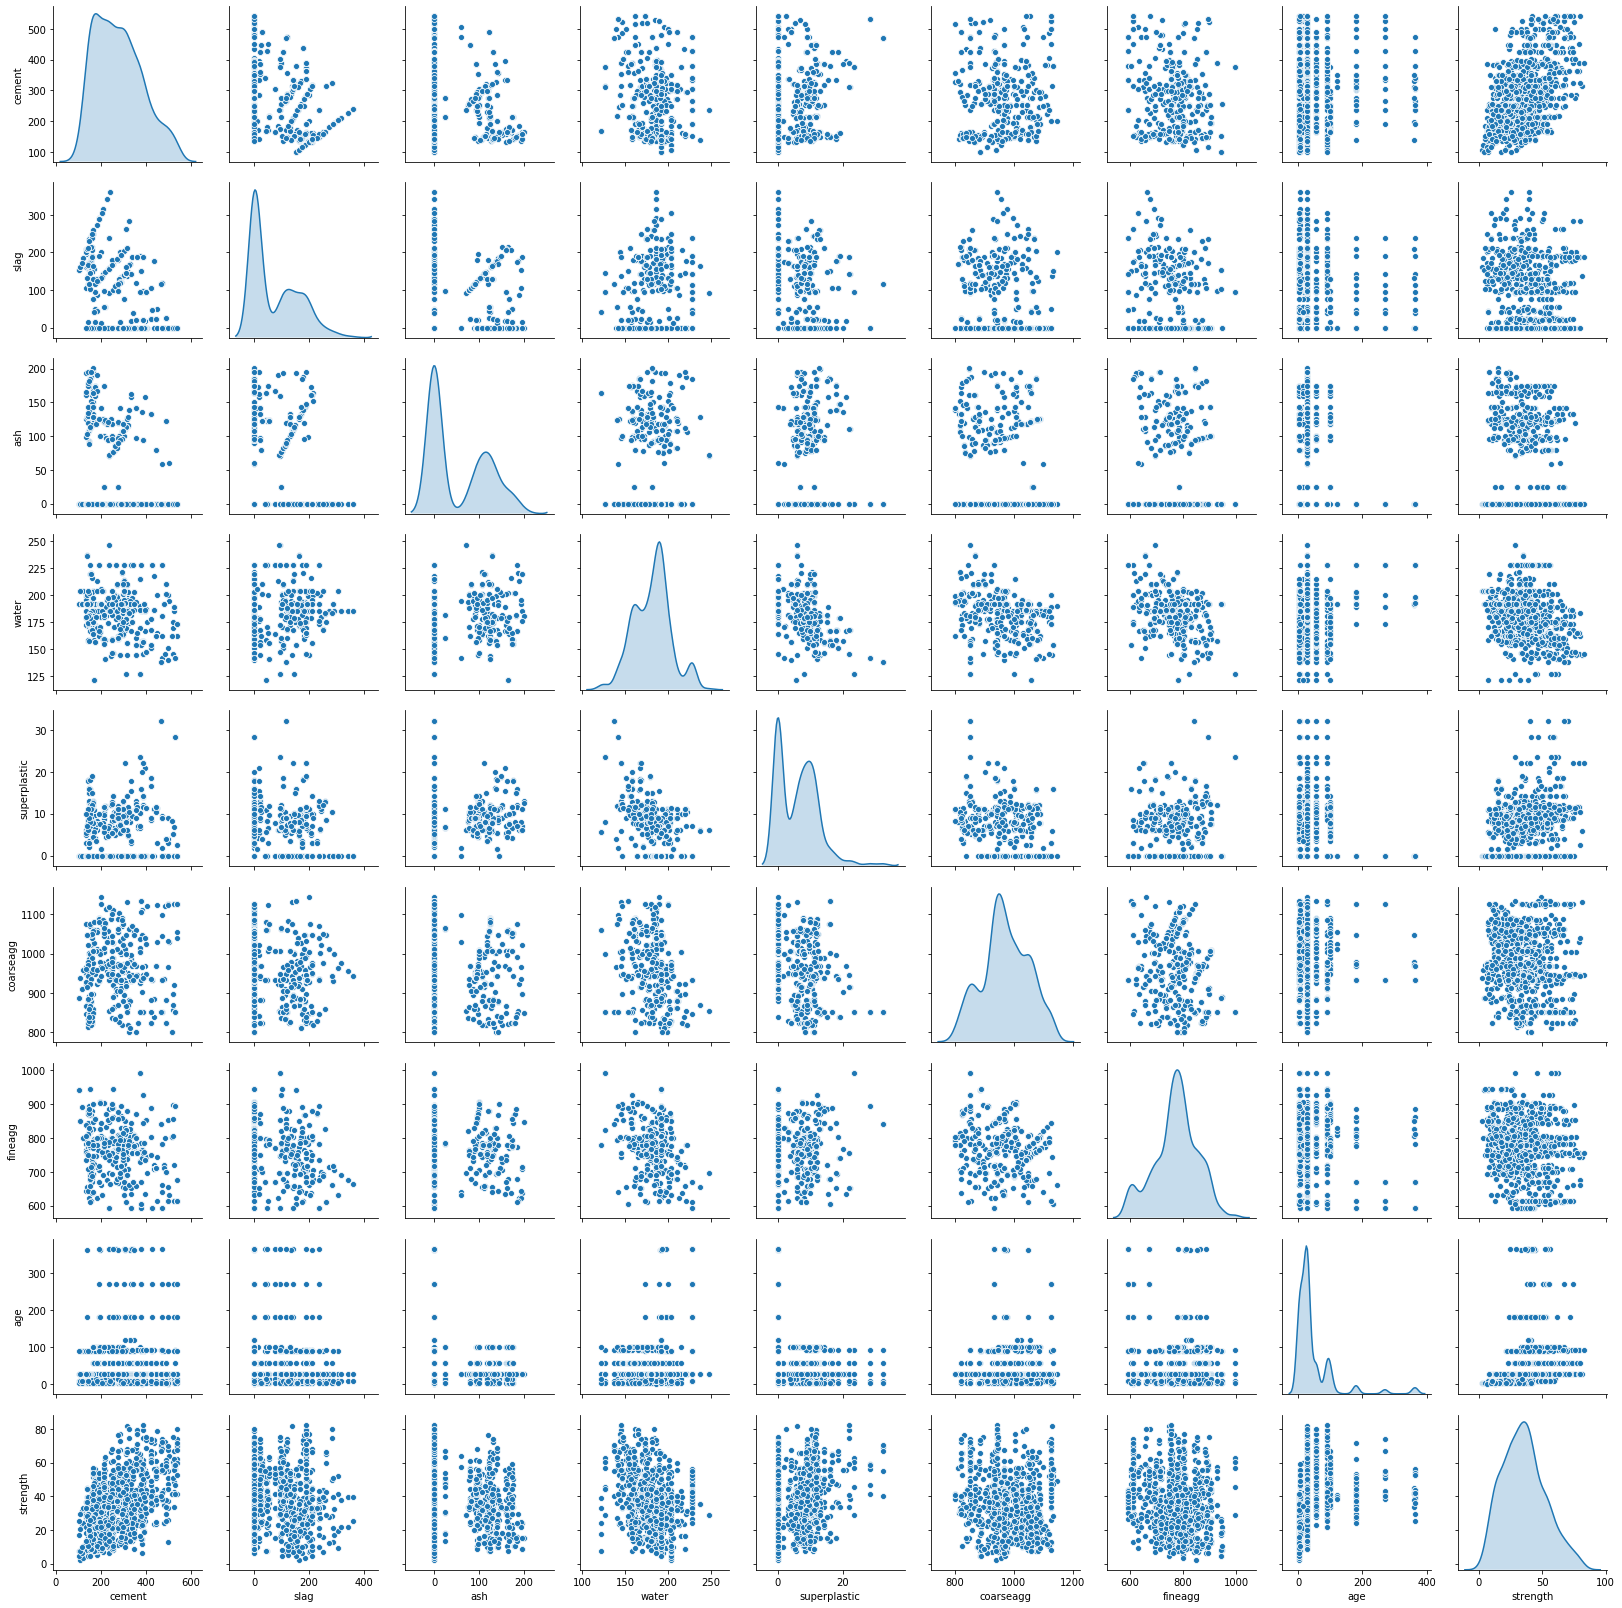

In [7]:
sns.pairplot(df,diag_kind = 'kde')

Dist Plot & Box Plot Summary:
1. Cement - Seems to have normal distribution with no outliers
2. Slag - Seems to be consist of two Gaussian/Clusters with few outliers
3. Ash - Seems to be consist of two Gaussian/Cluster with no outlier
4. Water - Seems to have Normal distribution with few outliers
5. SuperPlastic - Seems to be consist of two Gaussian/Cluster with few outlier
6. Coarseagg - Seems to have normal distribution with no outliers
7. Fineagg - Seems to have Normal distribution with few outliers
8. Age - Seems to have two Gaussian/Clusters with many Outliers but that outliers are expected as it ranges from 1-365

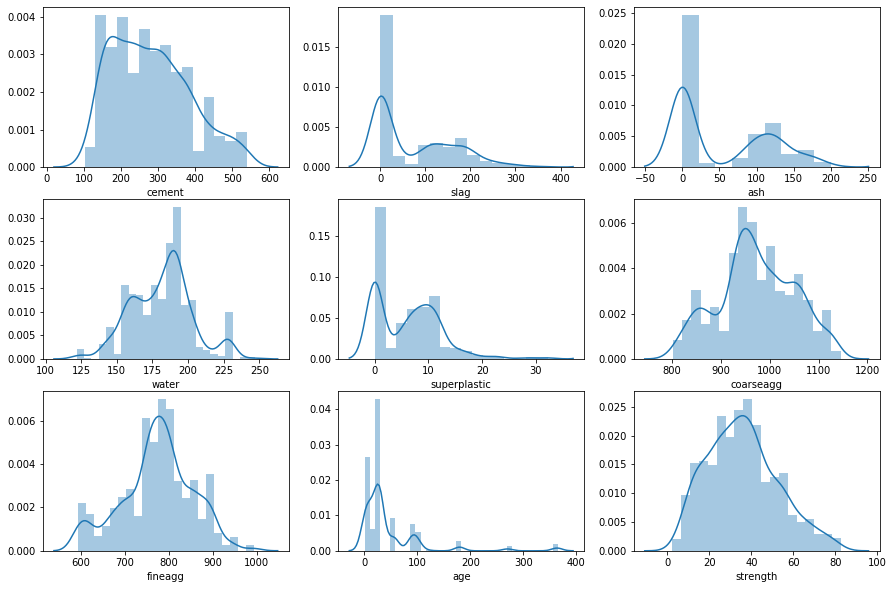

In [8]:
plt.figure(figsize=(15,10))
pos = 1
for i in df.columns:
    plt.subplot(3,3,pos)
    sns.distplot(df[i])
    pos +=1

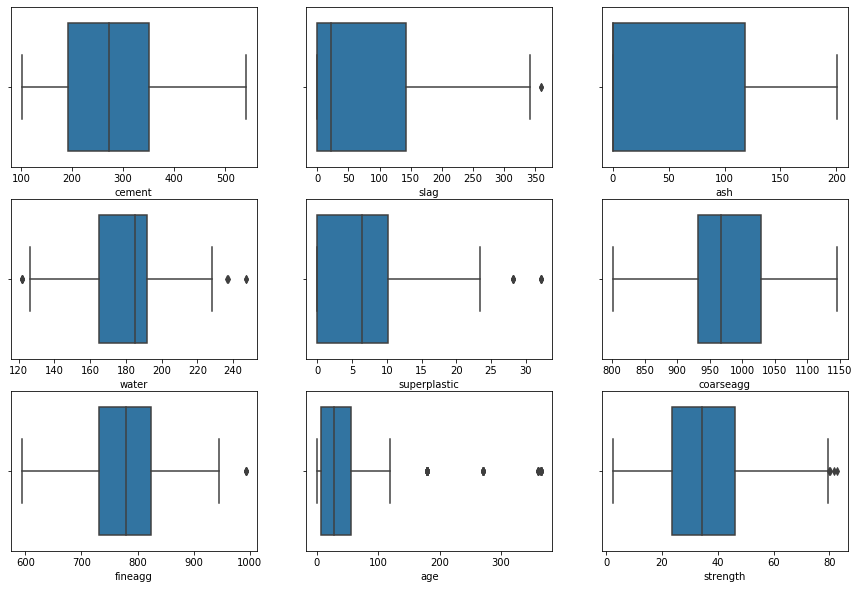

In [9]:
#Attribute slag,water,superplastic,fineagg have multiple outliers
plt.figure(figsize=(15,10))
pos = 1
for i in df.columns:
    plt.subplot(3,3,pos)
    sns.boxplot(df[i])
    pos +=1

                            checking Duplicates, missing value & Outliers

In [10]:
#No Missing Value
for i in df.columns:
    print(i)
    print(df[df[i].isna() == True].count())

cement
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
slag
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
ash
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
water
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
superplastic
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
coarseagg
cement          0
slag            0
ash             0
water           0
superpla

In [11]:
#No Null Value
for i in df.columns:
    print(i)
    print(df[df[i].isnull() == True].count())

cement
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
slag
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
ash
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
water
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
superplastic
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
coarseagg
cement          0
slag            0
ash             0
water           0
superpla

In [12]:
#Row 298,527,880,884,992,400,604,733,738,766,892,933,943,967 are duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 25


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [13]:
df_new = df.copy()

In [14]:
df_new.drop([298,527,880,884,992,400,604,733,738,766,892,933,943,967],inplace=True)

In [15]:
#All duplicated rows has been removed
dups_new = df_new.duplicated()
print('Number of duplicate rows = %d' % (dups_new.sum()))

df_new[dups_new]

Number of duplicate rows = 11


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
576,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
577,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [16]:
#Taking care of Outliers in slag,water,superplastic,fineagg attributes by replacing it with respective medians
l  = list(['slag', 'water', 'superplastic','fineagg'])
for i in l:
    q1,q2,q3 = df_new[i].quantile([0.25,.05,0.75])
    IQR = q3-q1
    a = df_new[i] > (q3 + 1.5*IQR)
    b = df_new[i] < (q1 - 1.5*IQR)
    df_new[i] = np.where(a|b,q2,df_new[i])

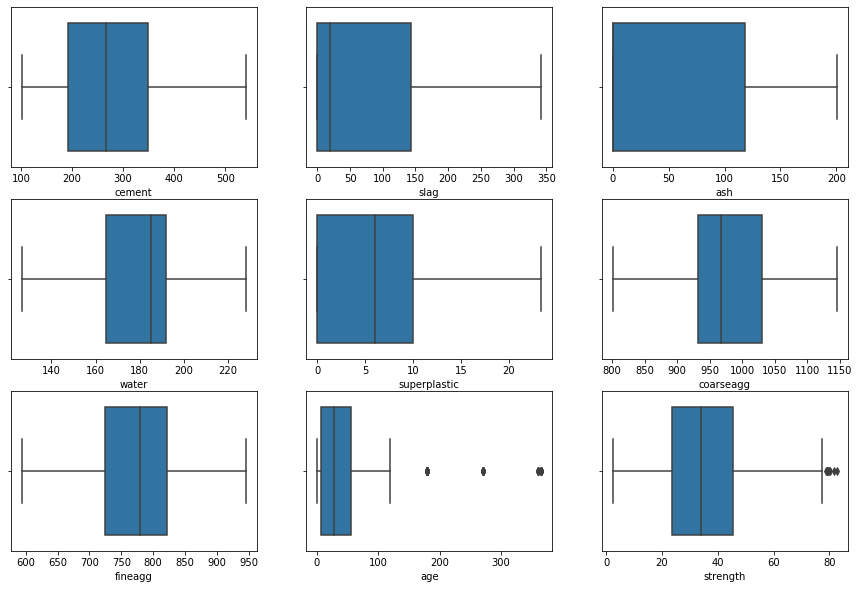

In [17]:
plt.figure(figsize=(15,10))
pos = 1
for i in df_new.columns:
    plt.subplot(3,3,pos)
    sns.boxplot(df_new[i])
    pos +=1

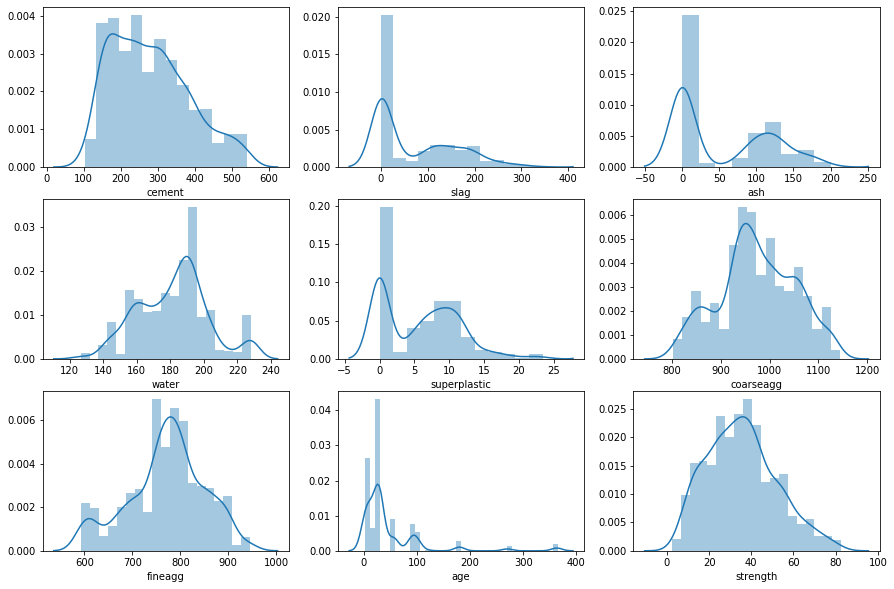

In [18]:
plt.figure(figsize=(15,10))
pos = 1
for i in df_new.columns:
    plt.subplot(3,3,pos)
    sns.distplot(df_new[i])
    pos +=1

                                Applying Feature Engineering Techniques

In [19]:

X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [20]:
X_scaled = X.apply(zscore)
X_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.326079,1.642571,-0.857210,1.050687,-1.062697,-0.025257,-0.286715,-0.279780
1,-1.061704,-0.349765,1.082375,-1.117406,0.913067,1.376861,0.312828,-0.500427
2,-0.284861,-0.844915,0.636099,0.278424,-0.056521,-0.216923,1.129814,-0.279780
3,-0.131600,0.492695,-0.857210,2.225870,-1.062697,-0.537223,-1.273383,-0.279780
4,-1.196765,1.306995,-0.857210,0.561427,0.602067,0.947221,-0.937790,-0.279780


     Using Covariance matrix to find PCA components and get appropriate number of PCA variable using elbow                                                      method

In [21]:
#step1: Compute covariance matrix
cov_matrix = np.cov(X_scaled.T)
print("covariance matrix \n", cov_matrix)

covariance matrix 
 [[ 1.00098522 -0.29167069 -0.39106565 -0.06070097 -0.03123627 -0.09778665
  -0.25742828  0.08432344]
 [-0.29167069  1.00098522 -0.31264061  0.1100133   0.04830349 -0.2806802
  -0.28595229 -0.04022921]
 [-0.39106565 -0.31264061  1.00098522 -0.28068038  0.47978368 -0.01940788
   0.10518161 -0.15680837]
 [-0.06070097  0.1100133  -0.28068038  1.00098522 -0.61691259 -0.169694
  -0.37914941  0.29005669]
 [-0.03123627  0.04830349  0.47978368 -0.61691259  1.00098522 -0.19178581
   0.09857437 -0.20302234]
 [-0.09778665 -0.2806802  -0.01940788 -0.169694   -0.19178581  1.00098522
  -0.1353336  -0.00437546]
 [-0.25742828 -0.28595229  0.10518161 -0.37914941  0.09857437 -0.1353336
   1.00098522 -0.15472614]
 [ 0.08432344 -0.04022921 -0.15680837  0.29005669 -0.20302234 -0.00437546
  -0.15472614  1.00098522]]


In [22]:
#Find Eigen Value and Eigen Vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[ 0.1807224  -0.47942331 -0.13477785 -0.39713603  0.73586639  0.13218852
  -0.04909471 -0.01507217]
 [ 0.16566017 -0.46340067 -0.21044963  0.7162714   0.0791247  -0.28618252
   0.27562782  0.19065916]
 [-0.46308368 -0.39920345 -0.39411997  0.02601035 -0.28720051  0.29270387
  -0.51240598  0.1986541 ]
 [ 0.51920661 -0.34326888  0.52588487  0.13152899 -0.27640251  0.40970933
  -0.25161375 -0.10567235]
 [-0.49789385 -0.04049316  0.66971229  0.20578036  0.35049132 -0.17698238
  -0.23303441  0.22611931]
 [-0.00230749 -0.32654453  0.19410514 -0.49341089 -0.36333731 -0.25024338
   0.35275702  0.54144157]
 [-0.34124228 -0.41194911  0.12028678 -0.10284646 -0.18027758 -0.21424862
   0.21956651 -0.74979557]
 [ 0.30252972 -0.01559125 -0.07071192 -0.12200236 -0.07745511 -0.71220888
  -0.60728712 -0.07943238]]

 Eigen Values 
 [2.27584271 0.06227178 0.20887473 1.42668811 1.23264761 0.7682218
 0.99450689 1.03882814]


In [23]:
#calculate variance explained and cummulative variance explained by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.42003383  46.23608243  61.62901211  74.60158305  87.02068359
  96.61400457  99.22236884 100.        ]


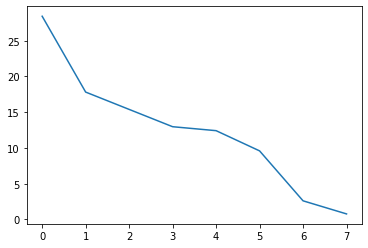

In [24]:
plt.plot(var_exp)

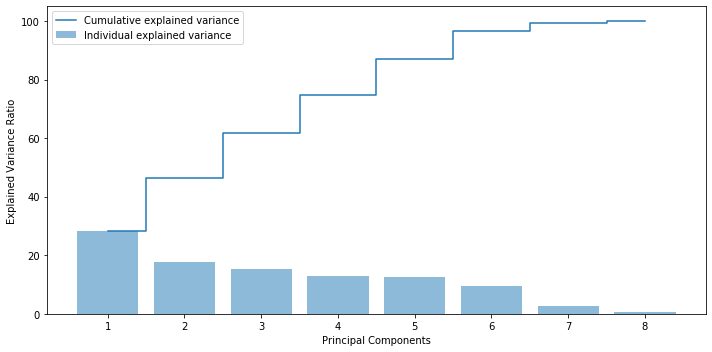

In [25]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Looking into figure we can say 6 principal component explain almost 95% of variance and we can move further with this number

    Using PCA from scikit learn with reduced dimension to find principal component and tranform into new                                                         variables 

In [26]:
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_scaled)
data_reduced.transpose()

array([[ 1.51730563, -2.0471421 , -0.78299741, ..., -0.5757131 ,
         3.62842349,  1.51232516],
       [ 1.67646131, -0.41029099, -0.42555608, ...,  1.19651749,
        -0.50603808, -2.57119058],
       [-1.18000117, -1.00883022, -0.65912225, ...,  0.59646532,
        -0.18321311,  1.45452241],
       [ 0.03507081,  1.03955884, -1.01499317, ..., -0.32489757,
        -0.34770084,  2.02812319],
       [-1.0384028 , -0.32776967,  0.26026653, ...,  0.55541343,
         2.62785761, -1.0556154 ],
       [ 0.01071051,  0.39800624, -0.52589339, ..., -0.41134865,
         1.06771154, -0.71406161]])

In [27]:
pca_data = pd.DataFrame(data_reduced)

        Using New Principal Component Variables to fit in simple linear model, Ridge and Lasso model

In [28]:
X_train,X_test,y_train,y_test = train_test_split(pca_data,y, random_state = 1)

In [29]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print("Linear regression accuracy score")
print(regression_model.score(X_test,y_test))

Linear regression accuracy score
0.568501145778638


In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge()
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
print("Ridge accuracy score")
print(ridge.score(X_test, y_test))

Ridge model: [-0.01315456 -0.3339222   8.81304058  2.02157058  3.84667362  6.77705046]
Ridge accuracy score
0.5684465705031482


In [31]:
lasso = Lasso()
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print("Lasso accuracy score")
print(lasso.score(X_test, y_test))

Lasso model: [ 0.         -0.          8.02447094  1.03100461  2.85120594  5.60557587]
Lasso accuracy score
0.5392505104519928


    Using scaled data Variables to fit in simple linear model, Ridge and Lasso model(Regularisation on linear   dataset)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, random_state = 1)

In [33]:
regression_model.fit(X_train, y_train)
print("Linear regression accuracy score")
print(regression_model.score(X_test,y_test))

Linear regression accuracy score
0.6029768226779684


In [34]:
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
print("Ridge accuracy score")
print(ridge.score(X_test, y_test))

Ridge model: [11.92720552  7.927066    4.57040987 -4.10822442  2.0530617   0.66841847
  1.25383254  6.9320726 ]
Ridge accuracy score
0.6030327303951692


In [35]:
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print("Lasso accuracy score")
print(lasso.score(X_test, y_test))

Lasso model: [ 7.70867325  3.65208791  0.         -3.41938096  3.28479342 -0.
 -0.          5.37946274]
Lasso accuracy score
0.5633027291268982


    Using quadratic relation between attributes and applying on linear regression model and regularisation    techniques like Ridge & Lasso

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [37]:
#Polynomial in linear model
poly_clf = LinearRegression()
poly_clf.fit(X_train_poly,y_train)
print("Insample Accuracy")
print(poly_clf.score(X_train_poly,y_train))
print("Outsample Accuracy")
print(poly_clf.score(X_test_poly,y_test))

Insample Accuracy
0.7684407488796922
Outsample Accuracy
0.7052771959462625


In [38]:
poly_clf.coef_

array([-7.74489779e-16,  1.29638137e+01,  9.12703792e+00,  5.41398878e+00,
       -2.89369606e+00,  3.85268327e+00, -7.22471041e-02,  7.11608452e-01,
        1.45545973e+01,  1.60880858e+00,  2.15765405e+00, -3.89173149e+00,
       -2.60412134e+00,  1.16478114e+00,  1.04651443e+00,  3.81306284e+00,
        1.97876915e+00, -2.17978516e+00, -5.65886514e-01,  5.14011563e-01,
        2.11085730e+00,  4.33194246e+00, -4.40781654e+00, -3.26135781e+00,
        7.67394359e-01,  1.74586826e+00,  5.82300060e+00,  1.46023312e+00,
       -2.26191841e+00, -7.80683687e-01,  2.14676803e-01, -4.71157806e-01,
       -4.44516747e-01,  4.40086298e+00,  1.60546212e+00,  6.35627064e-01,
        3.06425833e+00])

In [39]:
#Polynomial in Ridge
ridge_poly = Ridge(alpha=.3)
ridge_poly.fit(X_train_poly,y_train)
print("Insample Accuracy")
print(ridge_poly.score(X_train_poly, y_train))
print("Outsample Accuracy")
print(ridge_poly.score(X_test_poly, y_test))



Insample Accuracy
0.7684329078405789
Outsample Accuracy
0.7055308141932558


In [40]:
ridge_poly.coef_

array([ 0.        , 12.86367135,  9.02833117,  5.32625098, -2.953948  ,
        3.84866965, -0.11424446,  0.63760648, 14.52534599,  1.59012661,
        2.13929624, -3.86379693, -2.56099179,  1.15244017,  1.03944346,
        3.69517274,  1.95432848, -2.16225972, -0.53469892,  0.49835731,
        2.10177218,  4.23926422, -4.37595008, -3.23210115,  0.75604584,
        1.74225999,  5.7180421 ,  1.47498817, -2.24848327, -0.7828866 ,
        0.139447  , -0.45008561, -0.42415648,  4.38517477,  1.59803092,
        0.6115546 ,  2.97137524])

In [41]:
#Polynomial in Lasso
lasso_poly = Lasso(alpha=0.3)
lasso_poly.fit(X_train_poly,y_train)
print("Insample Accuracy")
print(lasso_poly.score(X_train_poly, y_train))
print("Outsample Accuracy")
print(lasso_poly.score(X_test_poly, y_test))

print (lasso_poly.coef_)

Insample Accuracy
0.7328068410824313
Outsample Accuracy
0.6993596171170814
[ 0.          9.87677648  5.65919117  2.05758277 -4.01458002  3.76347763
 -0.458681   -0.32946967 12.27041045  0.          0.         -0.70397259
 -0.          0.          0.         -0.15074377  0.          0.
  0.73348083 -0.03210084  0.7861882   0.78644898 -0.93636441 -0.97418594
  0.          0.28456785  1.59539405  1.18724358 -1.02293709 -0.30927728
 -1.35237579  0.35974378  0.23986504  3.91074045  0.70761508  0.
  0.        ]


                       Using KMeans Clustering to analysis different Gaussians

In [42]:
from sklearn.cluster import KMeans
cluster_range = range( 2, 6 )   # expect 2 to 3 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,3.147316e+07
1,3,2.499578e+07
2,4,2.198953e+07
3,5,1.981476e+07


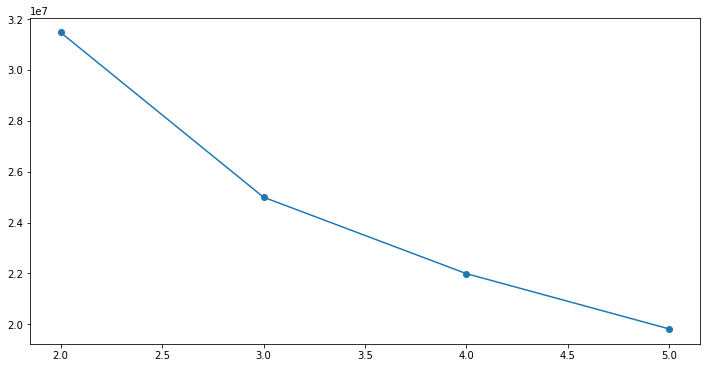

In [43]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [44]:
#Use 4 clusters
from scipy.stats import zscore

Kmeans_df = df.copy()
Kmeans_df_z = Kmeans_df.apply(zscore)

cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(Kmeans_df_z)

prediction=cluster.predict(Kmeans_df_z)
Kmeans_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record



In [45]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.67896907, -0.22595549, -0.84714393,  1.41378316, -1.03914281,
        -0.01164038, -1.04526896,  2.95800897,  0.57822808],
       [-0.62375205, -0.42230513,  1.14094855, -0.29432634,  0.41340669,
         0.10321448,  0.23292867, -0.16690295, -0.24295822],
       [ 0.99411454,  0.44910724, -0.39310349, -0.85908067,  1.01338208,
        -0.6725557 ,  0.12244815, -0.19560276,  1.14211791],
       [-0.07670187,  0.21478002, -0.79179853,  0.55059077, -0.8398304 ,
         0.29838479, -0.11516484, -0.27868597, -0.54373692]])

In [46]:
Kmeans_df_z.head(20)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018,3
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108,1
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144,1
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806,3
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727,3
5,-0.250517,-0.856888,-0.847144,0.488793,-1.039143,-1.069519,2.139079,0.702224,-0.835925,3
6,-1.094894,2.044404,-0.847144,1.027590,-1.039143,0.034498,-1.010525,-0.612331,-1.201845,3
7,-0.284981,-0.856888,1.002278,0.324811,0.032715,0.713893,-0.198167,0.163731,0.049231,1
8,0.141995,-0.856888,-0.847144,0.488793,-1.039143,1.442184,-0.107073,-0.279733,-0.848501,3
9,-1.207861,1.276756,1.388421,0.582497,0.468157,-1.195619,-0.930662,-0.279733,-0.408918,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21809c88>,
      dtype=object)

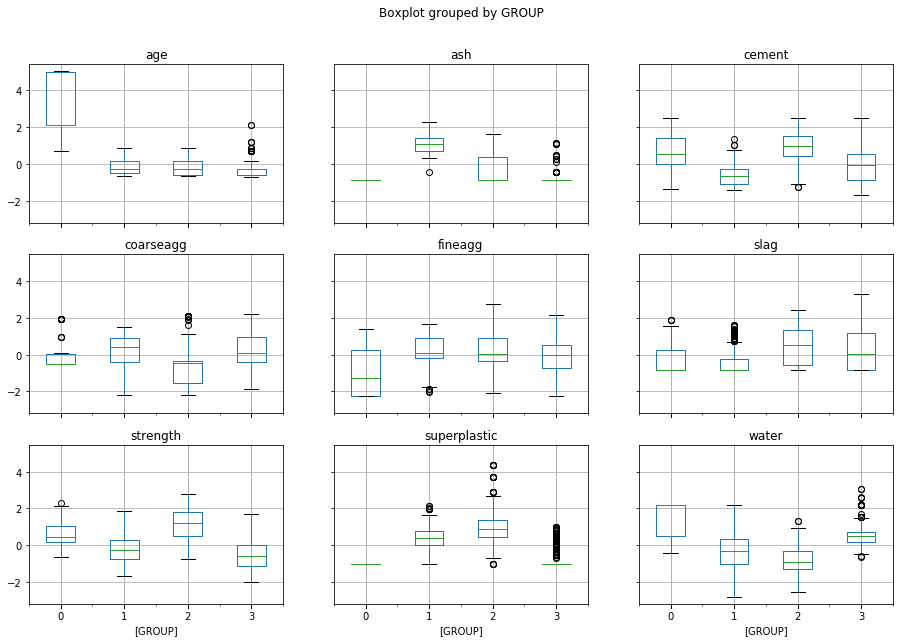

In [47]:
Kmeans_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In [48]:
# Addressing outliers at group level

data = Kmeans_df_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(Kmeans_df_z['GROUP']))

/Users/aadishagrawal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fc7bcf8>,
      dtype=object)

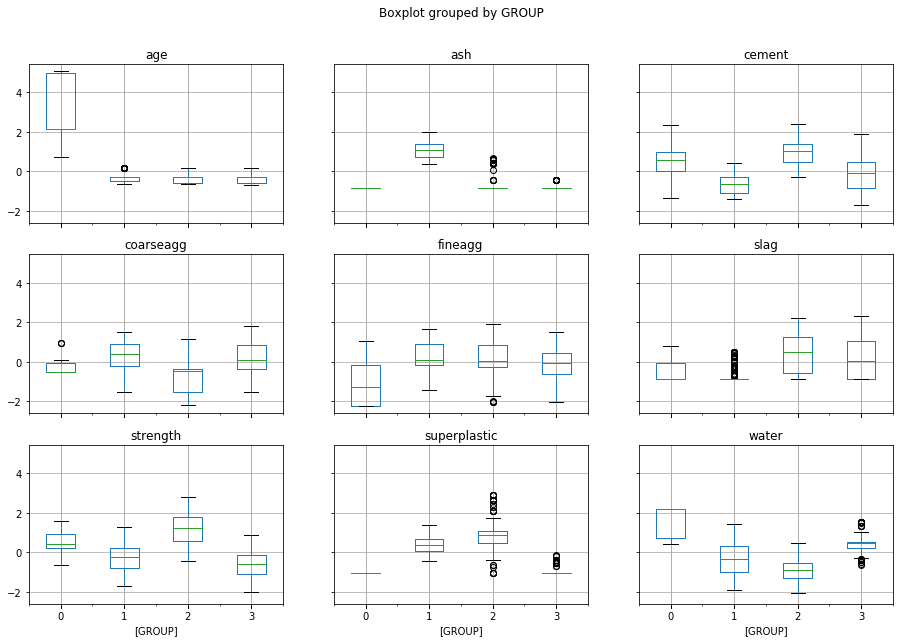

In [49]:
#Replacing median with outliers creates new outliers
concat_data.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In [50]:
#Break clusters into separate datasets and analyze individually
print(concat_data['GROUP'].unique())

Cluster1 = concat_data[concat_data['GROUP']==0]
Cluster2 = concat_data[concat_data['GROUP']==1]
Cluster3 = concat_data[concat_data['GROUP']==2]
Cluster4 = concat_data[concat_data['GROUP']==3]

[3 1 2 0]


/Users/aadishagrawal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/aadishagrawal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


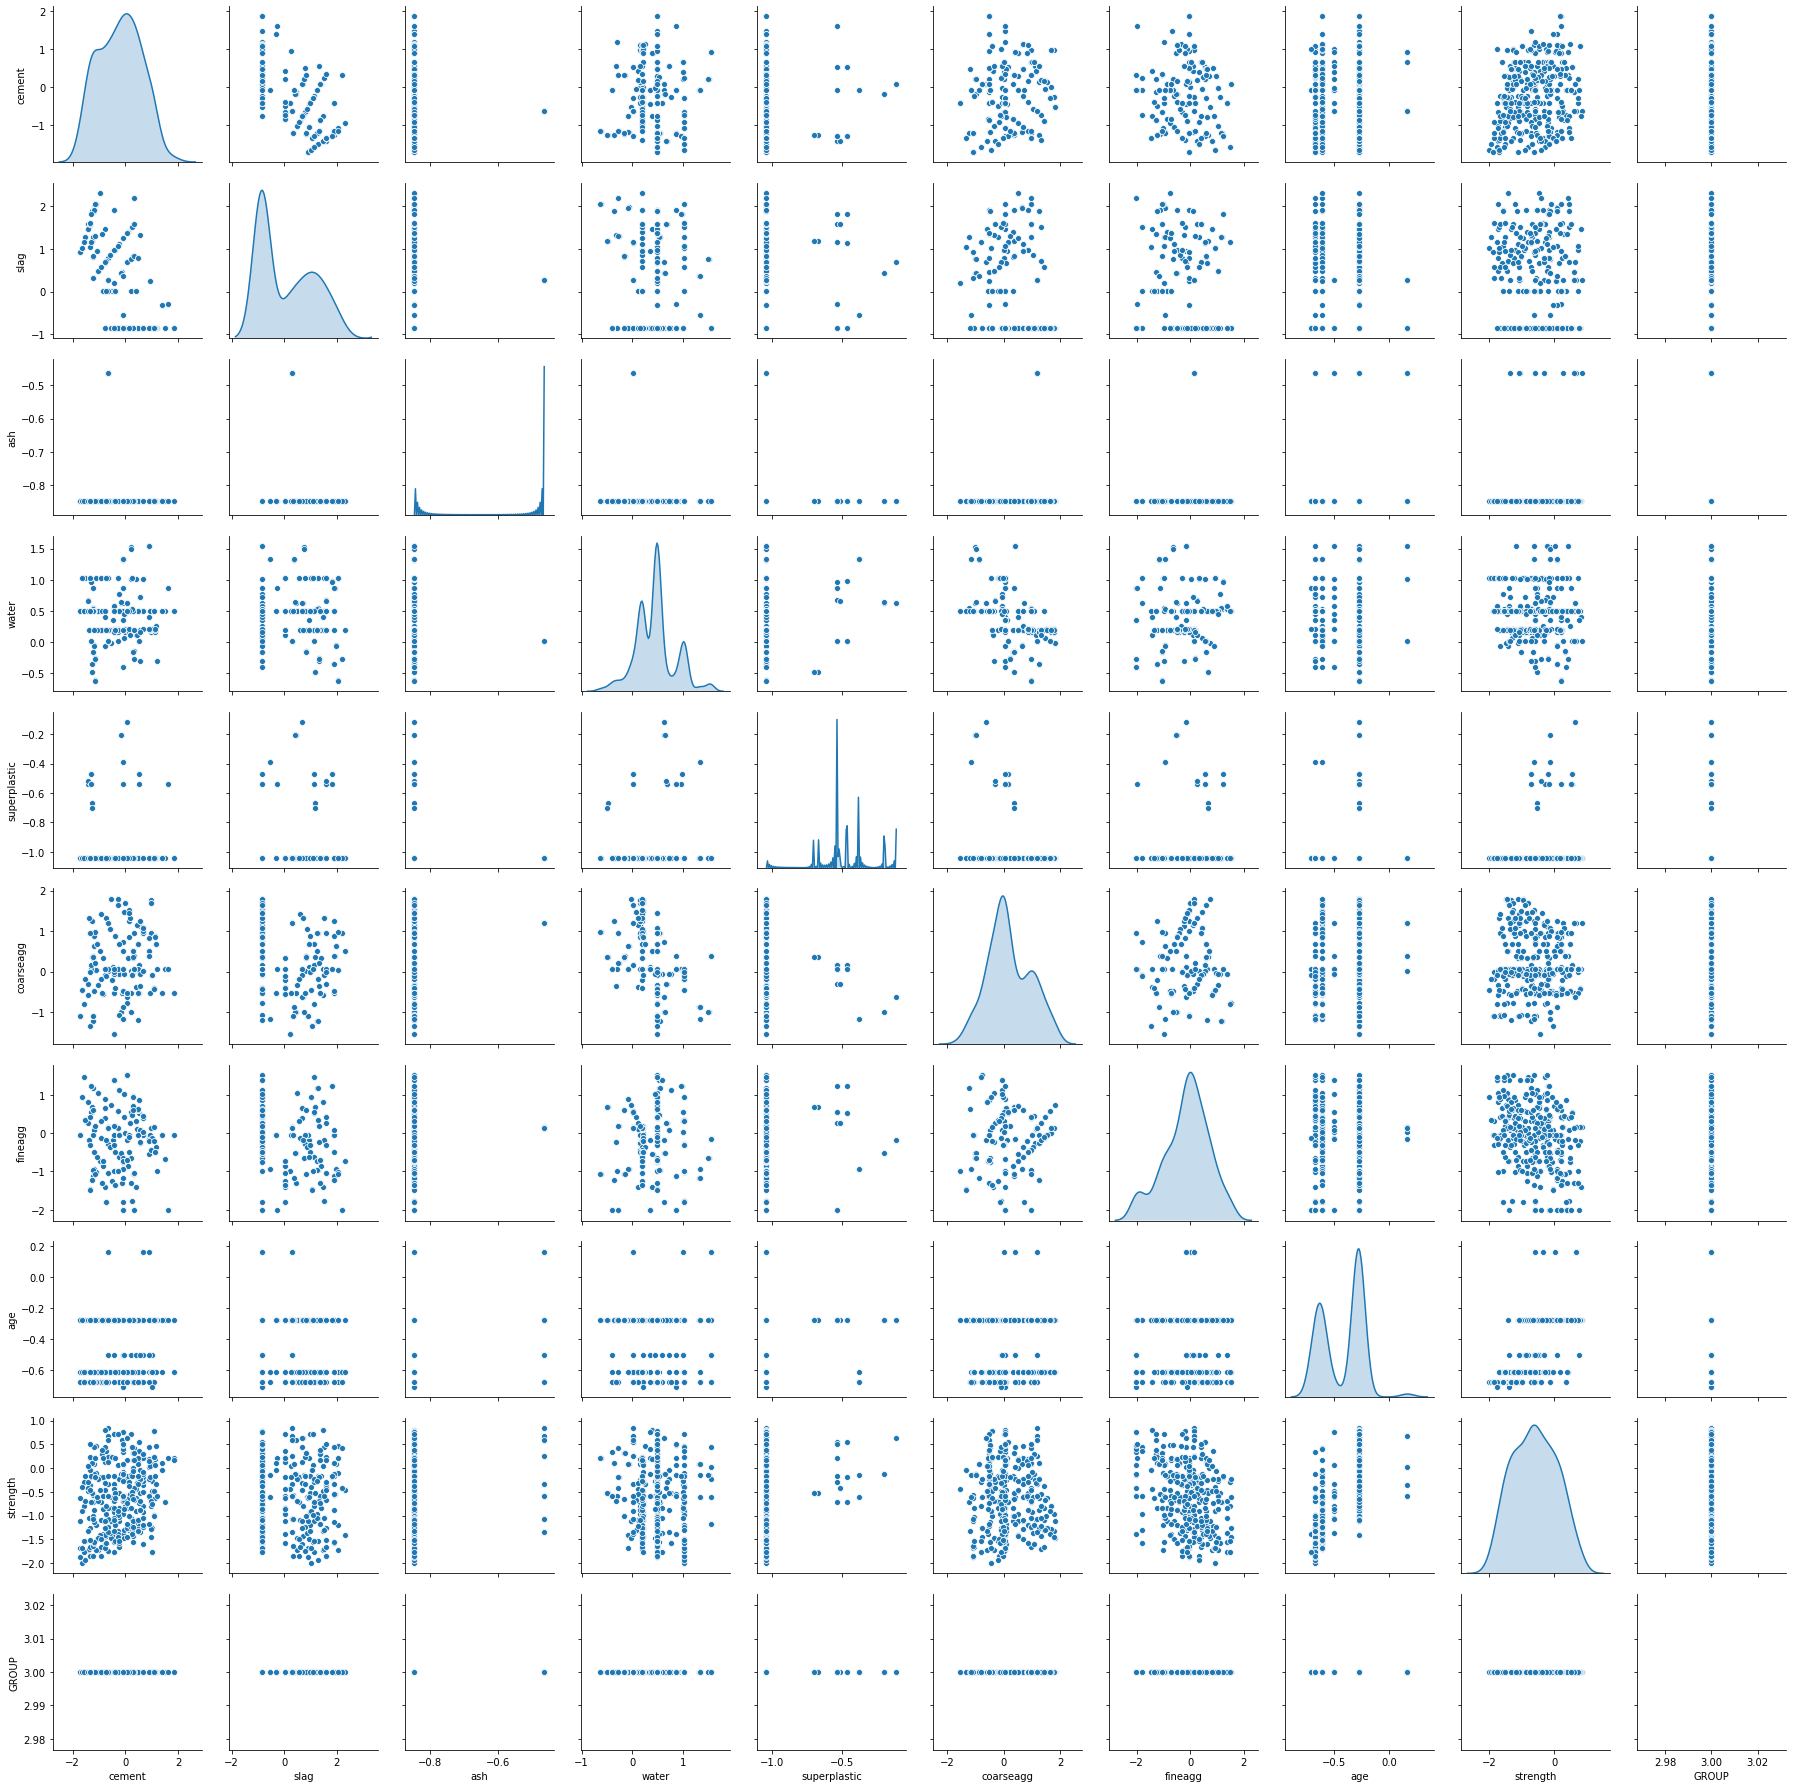

In [51]:
#Looking into Cluster4
sns.pairplot(Cluster4,diag_kind='kde')

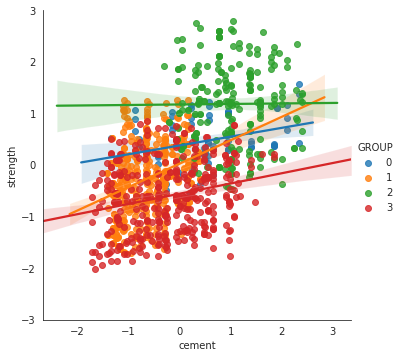

In [52]:
# Let us analyze the strength column vs other columns group wise.
# strength Vs cement
#Group2 has highest strength prediction power for independent attribute cement as its slope is higher compares to others
var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

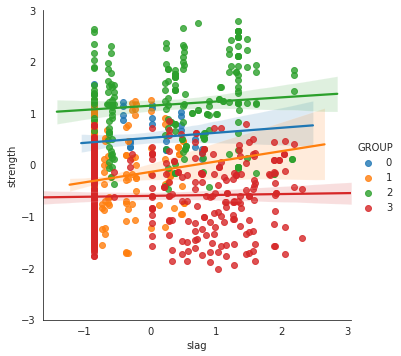

In [53]:
# strength Vs slag
#None of the group for slag attribute is good predictor of strength
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

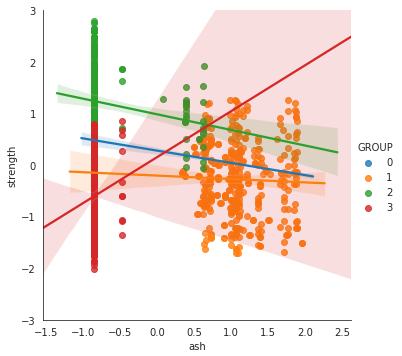

In [54]:
# strength Vs ash
#Group3 has highest strength prediction power for independent attribute ash as its slope is higher compares to others
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

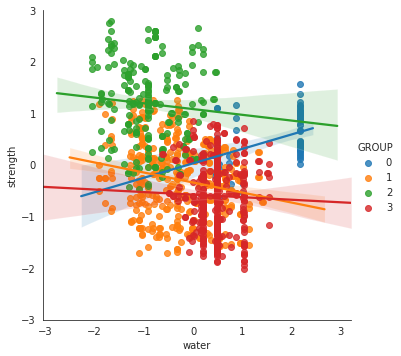

In [55]:
# strength Vs water
#Group0 has highest strength prediction power for independent attribute water as its slope is higher compares to others
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

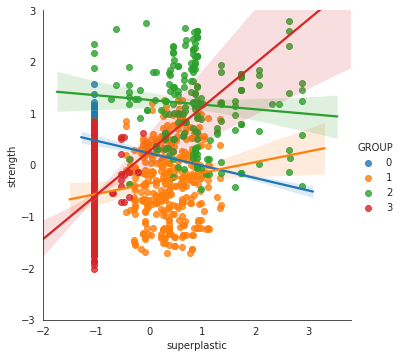

In [56]:
# strength Vs superplastic
#Group3 has highest strength prediction power for independent attribute superplastic as its slope is higher compares to others
var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

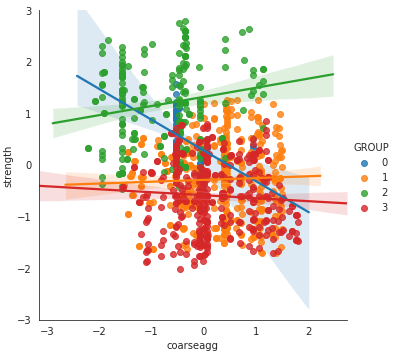

In [57]:
# strength Vs coarseagg
#Group0 shows highest negatively correlation between independent attribute coarseagg and target variable strength
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

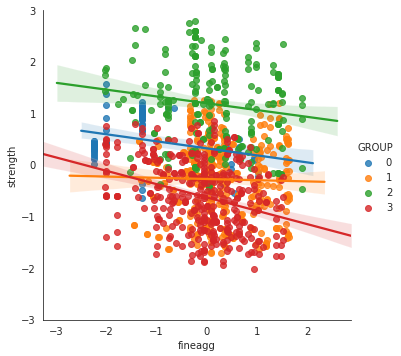

In [58]:
# strength Vs fineagg
#Group3 shows highest negatively correlation between independent attribute fineagg and target variable strength
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

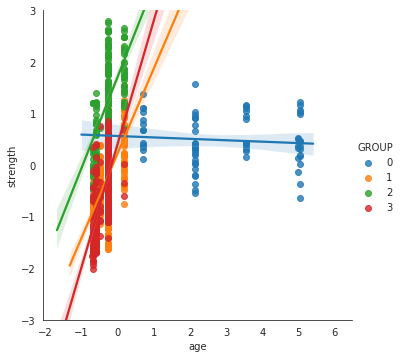

In [59]:
# strength Vs age
#Group3,Group2,Group1  has high strength prediction power for independent attribute age as its slope is higher
var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [60]:
#Build Random Forest Regressor without tuning the model

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_val_score

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, random_state = 1)
rgr_RF = RandomForestRegressor(n_estimators=50)
rgr_RF.fit(X_train,y_train)
print("Insample Accuracy")
print(rgr_RF.score(X_train,y_train))
print("Outsample Accuracy")
print(rgr_RF.score(X_test,y_test))

Insample Accuracy
0.9825363530298149
Outsample Accuracy
0.8834485673801235


In [63]:
#Finding feature importance and arranging in descending order
#'age', 'cement' & 'water' has highest feature importance
feature_importances = rgr_RF.feature_importances_
feature_names = df_new.columns[0:8]
print(feature_names)
k = 8
print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])
print("Feature importance in descending order")
print(feature_names[top_k_idx])

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.31523608 0.07408396 0.0168714  0.13475257 0.04093083 0.03258316
 0.03883129 0.34671071]
Feature importance in descending order
Index(['age', 'cement', 'water', 'slag', 'superplastic', 'fineagg',
       'coarseagg', 'ash'],
      dtype='object')


In [64]:
#Using Cross validation to find range estimation at production
rgr_RF_CV = RandomForestRegressor(n_estimators=50)
result = cross_val_score(rgr_RF_CV,X_scaled,y,cv = 10)
print(result)
print('mean=', result.mean(), 'std = ',result.std())
#For 95 % confidence level the range estimation should be mean (+/-) 1.96*Std
mean = result.mean()
std = result.std()
print("Range Estimation")
print(((mean)-(1.96*std))*100,'-',((mean)+(1.96*std))*100)

[0.86551507 0.87886393 0.94786045 0.9206328  0.88715209 0.91884519
 0.93633303 0.90183602 0.90778689 0.92619801]
mean= 0.9091023496969768 std =  0.024727299249854232
Range Estimation
86.06368431672625 - 95.7567856226691


In [65]:
#Spliting the dataset into three sets: Train, Validation, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [66]:
#Tuning Random Forest Regressor using pipeline and Randomized search CrossValidation 
pipe_RF = Pipeline([('scl', StandardScaler()), ('rf', RandomForestRegressor())]) 

param_dist = {'rf__max_depth': [3, None],
              'rf__max_features': sp_randint(1, 8),
              'rf__min_samples_split': sp_randint(2, 8),
              'rf__min_samples_leaf': sp_randint(1, 8),
              'rf__bootstrap': [True, False],
              'rf__criterion': ["mse", "mae"]}
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(pipe_RF, param_distributions=param_dist, n_iter=samples, cv = 5)

In [67]:
randomCV.fit(X_train, y_train)

print(randomCV.best_params_)

{'rf__bootstrap': True, 'rf__criterion': 'mae', 'rf__max_depth': None, 'rf__max_features': 6, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3}


In [68]:
print("Training set Accuracy")
print(randomCV.score(X_train,y_train))
print("Validation set Accuracy")
print(randomCV.score(X_val,y_val))



Training set Accuracy
0.9397506505764834
Validation set Accuracy
0.8820663232272585


In [69]:
#Tuning Random Forest Regressor using pipeline and Grid search CrossValidation 
pipe_RF = Pipeline([('scl', StandardScaler()), ('rf', RandomForestRegressor(n_estimators = 50))]) 
param_grid = {'rf__max_depth': [3, None],
              'rf__max_features': [1, 3,5],
              'rf__min_samples_split': [2, 3, 5],
              'rf__criterion': ["mse", "mae"]}
# run grid search
grid_search = GridSearchCV(pipe_RF, param_grid=param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rf',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                           

In [70]:
print(grid_search.best_params_)
print("Training set Accuracy")
print(grid_search.score(X_train,y_train))
print("Validation set Accuracy")
print(grid_search.score(X_val,y_val))

{'rf__criterion': 'mae', 'rf__max_depth': None, 'rf__max_features': 5, 'rf__min_samples_split': 2}
Training set Accuracy
0.9821106612306987
Validation set Accuracy
0.8931859308772441


In [ ]:
#Apply Grid Search with different params
param_grid1 = {'rf__max_depth': [3, None],
              'rf__max_features': [1, 3, 5],
              'rf__min_samples_split': [2, 3, 5],
              'rf__criterion': ["mse", "mae"],
#              'rf__min_impurity_decrease':[0.1, 0.2, 0.3],
              'rf__bootstrap': [True, False]}
# run grid search
grid_search1 = GridSearchCV(pipe_RF, param_grid=param_grid1, cv = 5)
grid_search1.fit(X_train, y_train)

In [ ]:
print(grid_search1.best_params_)
print("Training set Accuracy")
print(grid_search1.score(X_train,y_train))
print("Validation set Accuracy")
print(grid_search1.score(X_val,y_val))

In [ ]:
#Random search accuracy at test set
print("Random search Test set Accuracy")
print(randomCV.score(X_test,y_test))


In [ ]:
#Grid search accuracy at test set
print("Grid search Test set Accuracy")
print(grid_search1.score(X_test,y_test))

In [ ]:
#Using best params found using Random Search CV for random forest Regressor
#Using Cross validation to find range estimation at production
rgr_RF_CV1 = RandomForestRegressor(n_estimators=50, bootstrap = False, criterion = 'mse', max_depth  = None, max_features = 4, min_samples_leaf = 1, min_samples_split= 4)
result = cross_val_score(rgr_RF_CV1,X_scaled,y,cv = 10)
print(result)
print('mean=', result.mean(), 'std = ',result.std())
#For 95 % confidence level the range estimation should be mean (+/-) 1.96*Std
mean = result.mean()
std = result.std()
print("Range Estimation")
print(((mean)-(1.96*std))*100,'-',((mean)+(1.96*std))*100)

In [ ]:
#Using best params found using Grid Search CV for random forest Regressor
#Using Cross validation to find range estimation at production
rgr_RF_CV2 = RandomForestRegressor(n_estimators=50, bootstrap = False, criterion = 'mse', max_depth  = None, max_features = 3, min_samples_split= 2)
result = cross_val_score(rgr_RF_CV2,X_scaled,y,cv = 10)
print(result)
print('mean=', result.mean(), 'std = ',result.std())
#For 95 % confidence level the range estimation should be mean (+/-) 1.96*Std
mean = result.mean()
std = result.std()
print("Range Estimation")
print(((mean)-(1.96*std))*100,'-',((mean)+(1.96*std))*100)